In [1]:
import re
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import pearsonr, zscore
from scipy.stats import pearsonr
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon, ranksums, kruskal
import statsmodels.api as sm
from sklearn.utils import resample
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor


In [2]:
# скачаємо файл
url = 'https://raw.githubusercontent.com/Illia061/StepProject/main/IKEA_SA_Furniture_Web_Scrapings_sss.csv'

df_ikea = pd.read_csv(url)


In [3]:
'''Step1 EDA'''
#Step 1: EDA - shape, head, tail, sample, info
'''
Аналізуємо набір данних магазину IKEA
На першому кроці аналізуємо та описуємо набір
Він має 3694 рядки та 14 стовпців
'''
df_ikea.shape

(3694, 14)

In [4]:
df_ikea.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [5]:
df_ikea.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [6]:
df_ikea.sample(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2483,2483,9306355,NYHAMN,Sofas & armchairs,1520.0,No old price,True,https://www.ikea.com/sa/en/p/nyhamn-sofa-bed-w...,Yes,Sofa-bed with triple cushion,IKEA of Sweden/L Hilland,97.0,90.0,200.0
2513,2513,90351084,VIMLE,Sofas & armchairs,425.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-cover-for-c...,Yes,Cover for corner section,Ehlén Johansson,NaN,NaN,NaN
3397,3397,20245964,BESTÅ,TV & media furniture,135.0,No old price,True,https://www.ikea.com/sa/en/p/besta-frame-black...,Yes,"Frame, 60x40x64 cm",IKEA of Sweden,40.0,64.0,60.0
1622,1622,50293722,LOTE,Chests of drawers & drawer units,115.0,No old price,True,https://www.ikea.com/sa/en/p/lote-chest-of-3-d...,No,"Chest of 3 drawers, 55x62 cm",David Wahl,36.0,62.0,55.0
594,594,40419958,JONAXEL,Bookcases & shelving units,70.0,No old price,True,https://www.ikea.com/sa/en/p/jonaxel-frame-whi...,Yes,"Frame, 50x51x70 cm",IKEA of Sweden,51.0,70.0,50.0


In [7]:
df_ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [8]:
df_ikea.describe()
'''
Також бачимо, що деякі поля в depth, height та width не заповнені
Стовпець Unnamed: 0 нам не потрібен, бо вони дублюють порядкові номери строк

З опису видно, що середня ціна 1078, мінімальна 3, а максимальна 9585
Середня ширина виробів 54, мінімальна 1, а максимальна 257
Середня висота виробів 101.6, мінімальна 1, а максимальна 700
Середня довжина виробів 104.5, мінімальна 1, а максимальна 420
'''

'\nТакож бачимо, що деякі поля в depth, height та width не заповнені\nСтовпець Unnamed: 0 нам не потрібен, бо вони дублюють порядкові номери строк\n\nЗ опису видно, що середня ціна 1078, мінімальна 3, а максимальна 9585\nСередня ширина виробів 54, мінімальна 1, а максимальна 257\nСередня висота виробів 101.6, мінімальна 1, а максимальна 700\nСередня довжина виробів 104.5, мінімальна 1, а максимальна 420\n'

In [9]:
'''
Перевіримо на унікальність
Унікальних 2962 вироби з 3694
'''
df_ikea['item_id'].nunique()

2962

In [10]:
'''
Перевіримо чи не дублюються строки
Дублікатів не має, а повторюваність у item_id скоріше визвана зміною ціни або категорії
'''
df_ikea.duplicated(subset=['item_id', 'name']).sum()
df_ikea.duplicated(subset=['item_id', 'name', 'price', 'old_price']).sum()

732

In [11]:
len(df_ikea['item_id'].unique())

2962

In [12]:
len(df_ikea['item_id'])

3694

In [13]:
'''
Видалимо стовпець, який дублює нумерацію
'''
df_ikea.drop('Unnamed: 0', axis = 1, inplace= True)


In [14]:
'''
Видалимо дублікати і залишимо останній запис з повторюваних
'''
df_no_duplicates = df_ikea.drop_duplicates(subset=['item_id', 'name'], keep='last')

In [15]:
df_no_duplicates.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
17,50363649,KULLABERG,Bar furniture,140.0,SR 175,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0
47,29123958,MINNEN,Beds,395.0,SR 445,True,https://www.ikea.com/sa/en/p/minnen-ext-bed-fr...,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Tina Christensen,NaN,NaN,85.0
48,49278341,BRIMNES,Beds,895.0,SR 925,True,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,"Bed frame w storage and headboard, ...",IKEA of Sweden/K Hagberg/M Hagberg,54.0,110.0,96.0
50,89326463,PLATSA,Beds,2111.0,"SR 2,205",True,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,"Bed frame with 4 drawers, 140...",Ola Wihlborg/IKEA of Sweden,40.0,43.0,140.0


In [16]:
df_no_duplicates.describe()

,item_id,price,depth,height,width
count,2.962000e+03,2962.000000,1844.000000,2236.000000,2520.000000
mean,4.877244e+07,1108.722552,55.920824,105.325581,109.268254
std,2.896535e+07,1393.576103,31.015201,63.166967,73.464503
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039630e+07,200.000000,38.000000,70.000000,60.000000
50%,4.928075e+07,570.000000,47.000000,84.000000,80.000000
75%,7.042306e+07,1475.000000,62.000000,136.000000,150.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [17]:
'''
Видалимо стовпець із старою ціною, бо він нам не потрібен
'''
df_no_duplicates.drop('old_price', axis = 1, inplace= True)

C:\Users\Analytic\AppData\Local\Temp\ipykernel_11612\3643111540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.drop('old_price', axis = 1, inplace= True)


In [18]:
'''
Скинемо індекси
'''
data=df_no_duplicates.reset_index(drop=True)
data.head()


,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
1,50363649,KULLABERG,Bar furniture,140.0,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0
2,29123958,MINNEN,Beds,395.0,True,https://www.ikea.com/sa/en/p/minnen-ext-bed-fr...,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Tina Christensen,NaN,NaN,85.0
3,49278341,BRIMNES,Beds,895.0,True,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,"Bed frame w storage and headboard, ...",IKEA of Sweden/K Hagberg/M Hagberg,54.0,110.0,96.0
4,89326463,PLATSA,Beds,2111.0,True,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,"Bed frame with 4 drawers, 140...",Ola Wihlborg/IKEA of Sweden,40.0,43.0,140.0


In [19]:
'''
Перевіримо дані у стовпцях на адекватність
'''
data['other_colors'].unique()
data['category'].unique()
data['designer'].unique()
'''
Стовпець дизайнери має нерелевантні дані, в яких не вказано дизайнера
'''
data['designer'][data['designer'].str.contains('\d', na=False)].nunique()

data['width'].dtype
data['height'].dtype
data['depth'].dtype

dtype('float64')

In [20]:
'''
Кількість по кожній категорії
'''
print(data.groupby("category")['price'].agg(["count", "max", "mean", "median"]).sort_values('count', ascending=False))

                                      count     max         mean  median
category                                                                
Tables & desks                          610  6965.0  1132.368033   595.0
Sofas & armchairs                       424  9585.0  2019.075472  1280.0
Bookcases & shelving units              396  3986.0   556.359596   387.3
Chairs                                  277  3032.0   454.727798   260.0
Wardrobes                               236  8380.0  2162.141949  1870.0
Outdoor furniture                       205  5144.0   813.320000   311.4
TV & media furniture                    190  4260.0   659.050526   175.0
Cabinets & cupboards                    189  6480.0  1001.830688   650.0
Beds                                    154  9585.0  1598.077922   970.0
Chests of drawers & drawer units        109  1880.0   643.206422   495.0
Nursery furniture                        72  1225.0   341.680556   285.0
Children's furniture                     39  1225.0

In [21]:
'''
Найбільша кількість меблів у категорії Tables & desks, найменша у Room dividers, Café furniture, Bar furniture.
Найдорожчі речі у категорії ліжок та шкафів. При цьому категорія шкафів Wardrobes має найвищу середню ціну.
Найдешевші речі у категоріях дитячих меблів та меблів для кафе
'''

'\nНайбільша кількість меблів у категорії Tables & desks, найменша у Room dividers, Café furniture, Bar furniture.\nНайдорожчі речі у категорії ліжок та шкафів. При цьому категорія шкафів Wardrobes має найвищу середню ціну.\nНайдешевші речі у категоріях дитячих меблів та меблів для кафе\n'

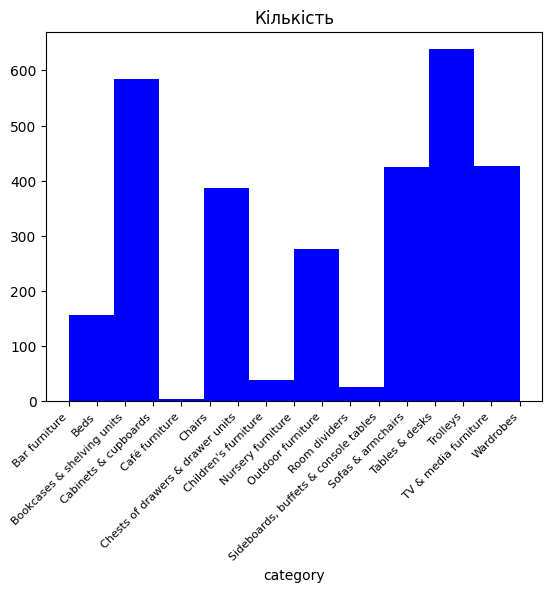

In [22]:
plt.hist(data['category'], color='blue')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.xlabel('category')
plt.title('Кількість')
plt.show()


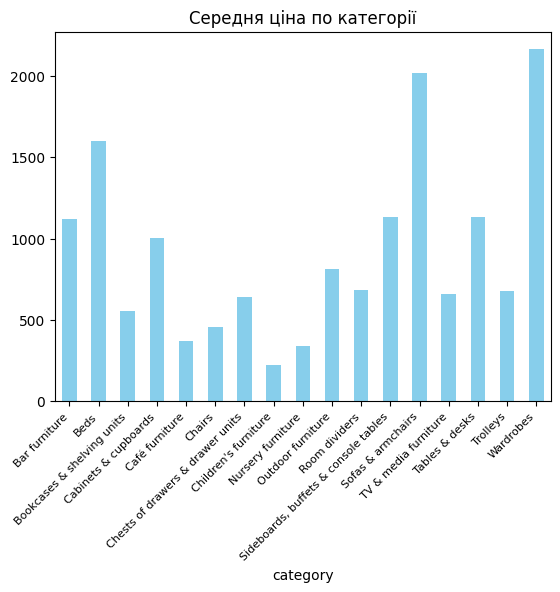

In [23]:
'''
Середня ціна по категорії
'''
average_prices = data.groupby('category')['price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.xlabel('category')
plt.title('Середня ціна по категорії')
plt.show()

<Axes: xlabel='category', ylabel='price'>

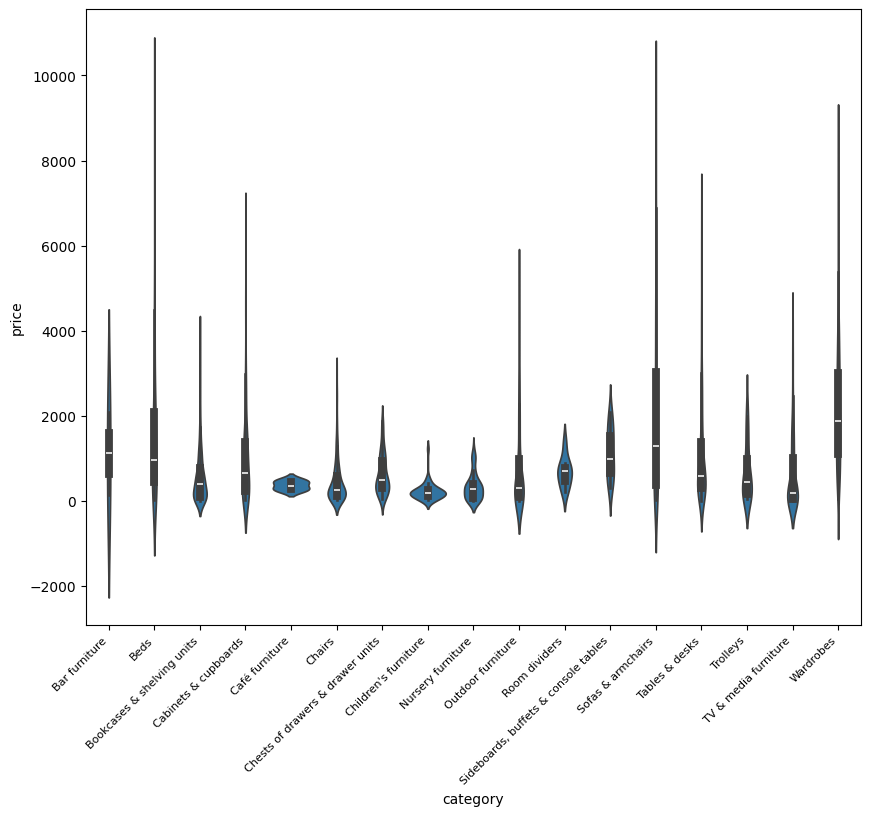

In [24]:
plt.subplots(figsize = (10,8))
plt.xticks(rotation=45, ha="right", fontsize=8)
sns.violinplot(data= data, x = 'category', y = 'price')

In [25]:
'''
Найбільші викиди ціни у катеоріях Wardrobes, Sofa & armchairs та Beds - що і пояснює їх високу середню ціну
Категорії Childrens furniture, Nursery furniture, Cafe furniture є найбільш збалансованими, і мають найменшу середню ціну
'''

'\nНайбільші викиди ціни у катеоріях Wardrobes, Sofa & armchairs та Beds - що і пояснює їх високу середню ціну\nКатегорії Childrens furniture, Nursery furniture, Cafe furniture є найбільш збалансованими, і мають найменшу середню ціну\n'

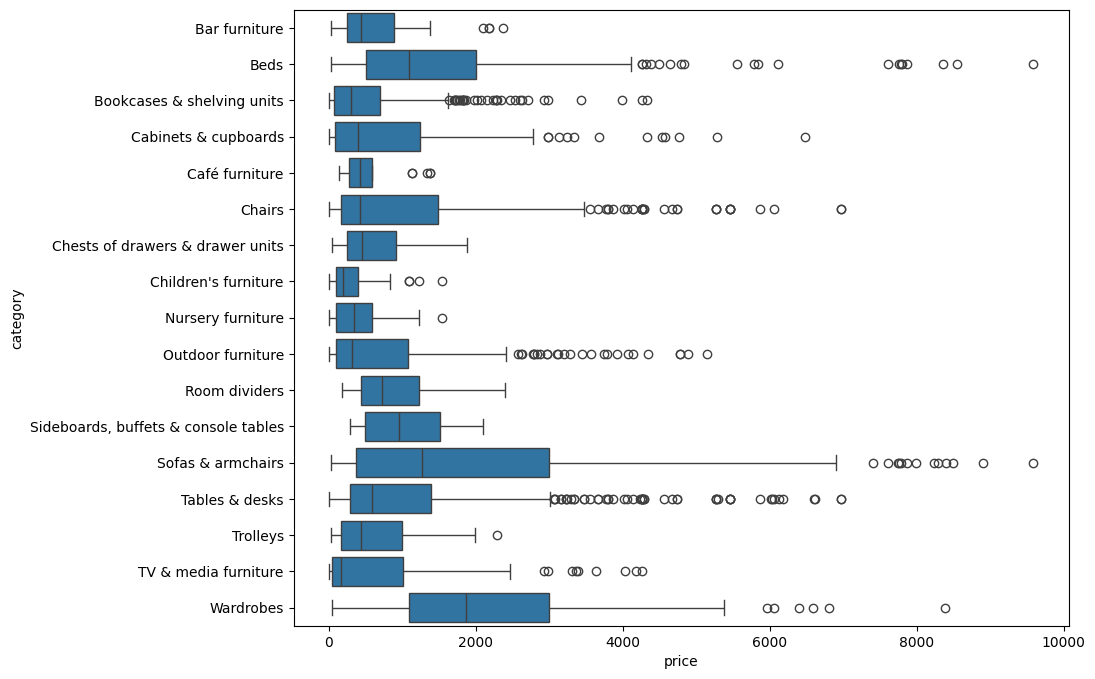

In [26]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = df_ikea, x = 'price', y = 'category')
plt.show()

C:\Users\Analytic\AppData\Local\Temp\ipykernel_11612\3853026628.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], bins=20)


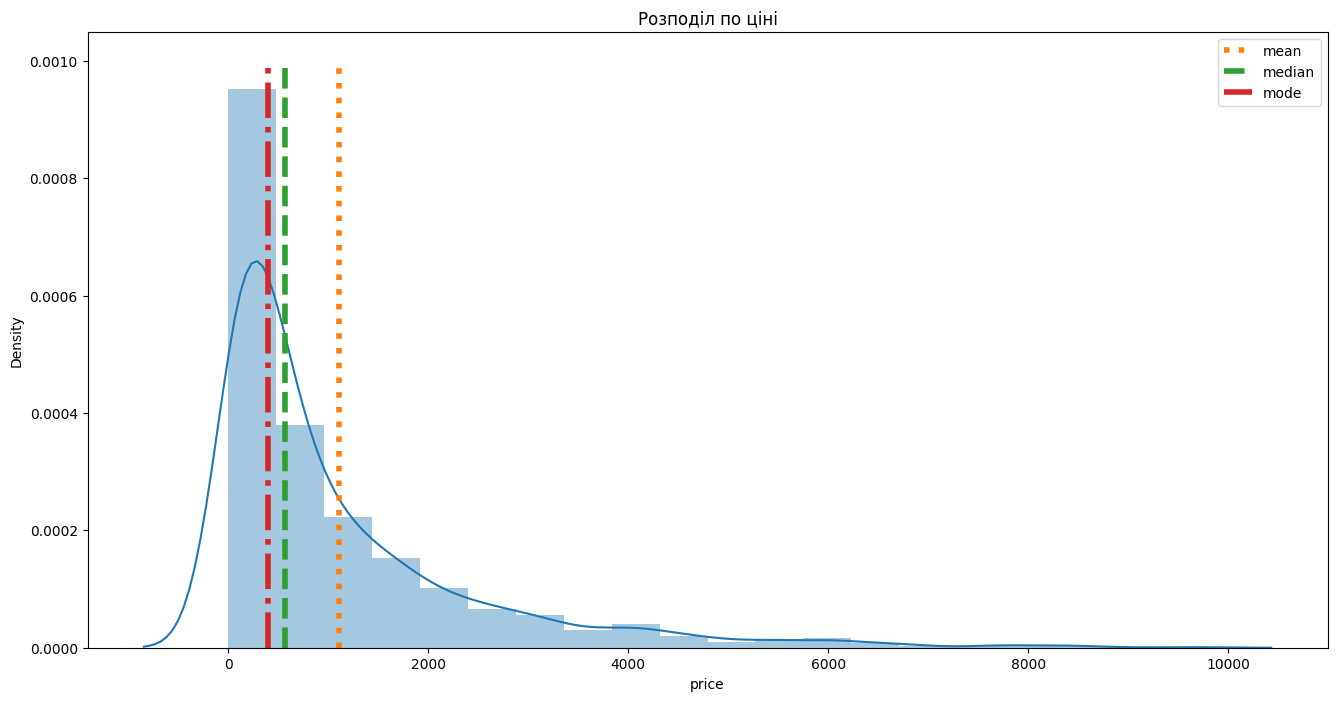

'\nПриблизно половина речей мають ціну меншу 500, при цьому середня ціна становить близько 1100\n'

In [27]:
target_mean = round(data['price'].mean(), 2)
target_median = data['price'].median()
target_mode = data['price'].mode()[0]

plt.figure(figsize=(16,8))
sns.distplot(data['price'], bins=20)
plt.title('Розподіл по ціні')

y=np.linspace(0, 0.001, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Розподіл по ціні')
plt.legend()
plt.show()

'''
Приблизно половина речей мають ціну меншу 500, при цьому середня ціна становить близько 1100
'''

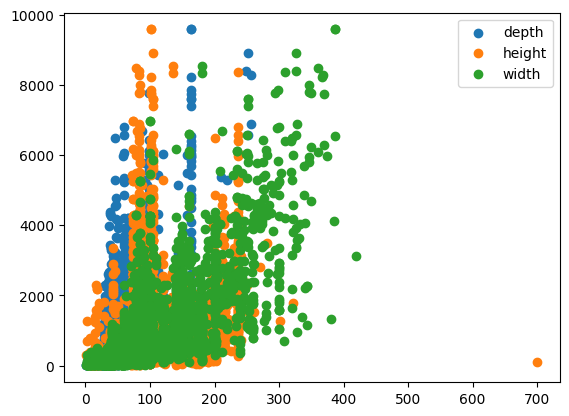

In [28]:
'''
Аналізуючи залежність ціни від розмірів можна побачити, що найбільша залежність ціни від довжини і хітмап це підтверждує
'''
plt.scatter(x=data['depth'], y=data['price'])
plt.scatter(x=data['height'], y=data['price'])
plt.scatter(x=data['width'], y=data['price'])
plt.legend(labels=['depth', 'height','width'])

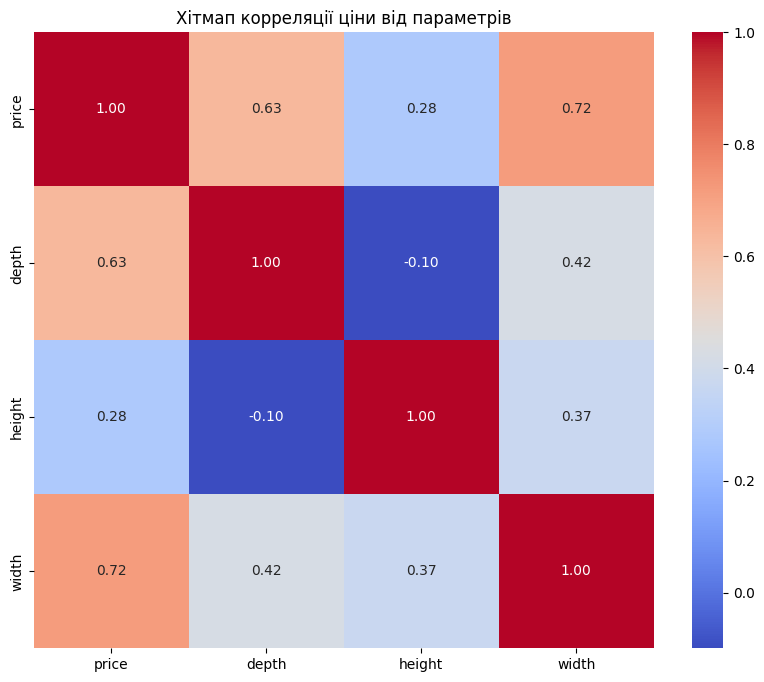

In [29]:
numeric_columns = ['price', 'depth', 'height', 'width']
numeric_data = data[numeric_columns]

# Створюємо корреляційну матрицю
correlation_matrix = numeric_data.corr()

# Створюємо хітмап
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Настроим подписи осей и заголовок
plt.title('Хітмап корреляції ціни від параметрів')
plt.show()

In [30]:
'''
Додамо стовпець об'ем меблів и розглянемо залежність ціни від об'ему
Бачимо, що залежність не велика 0,64
'''
for index, row in data.iterrows():
    if pd.isnull(row['depth']) and pd.isnull(row['height']) and pd.isnull(row['width']):
        # Если значения в столбцах "depth", "height", "width" равны NaN, устанавливаем значение "area" равным 1
        data.at[index, 'volume'] = np.nan
    elif pd.notna(row['depth']) and pd.isnull(row['height']) and pd.notna(row['width']):
        data.at[index, 'volume']=data.at[index,'depth']*data.at[index,'width']
    elif pd.isnull(row['depth']) and pd.notna(row['height']) and pd.notna(row['width']):
        data.at[index, 'volume']=data.at[index,'height']*data.at[index,'width']
    elif pd.notna(row['depth']) and pd.notna(row['height']) and pd.isnull(row['width']):
        data.at[index, 'volume']=data.at[index,'height']*data.at[index,'depth']
    elif pd.notna(row['depth']) and pd.isnull(row['height']) and pd.isnull(row['width']):
        data.at[index, 'volume']=data.at[index,'depth']
    elif pd.isnull(row['depth']) and pd.notna(row['height']) and pd.isnull(row['width']):
        data.at[index, 'volume']=data.at[index,'height']
    elif pd.isnull(row['depth']) and pd.isnull(row['height']) and pd.notna(row['width']):
        data.at[index, 'volume']=data.at[index,'width']
    else: data.at[index, 'volume']=data.at[index,'width']*data.at[index,'height']*data.at[index,'depth']
data.head()

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume
0,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,NaN
1,50363649,KULLABERG,Bar furniture,140.0,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0,1296.0
2,29123958,MINNEN,Beds,395.0,True,https://www.ikea.com/sa/en/p/minnen-ext-bed-fr...,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Tina Christensen,NaN,NaN,85.0,85.0
3,49278341,BRIMNES,Beds,895.0,True,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,"Bed frame w storage and headboard, ...",IKEA of Sweden/K Hagberg/M Hagberg,54.0,110.0,96.0,570240.0
4,89326463,PLATSA,Beds,2111.0,True,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,"Bed frame with 4 drawers, 140...",Ola Wihlborg/IKEA of Sweden,40.0,43.0,140.0,240800.0


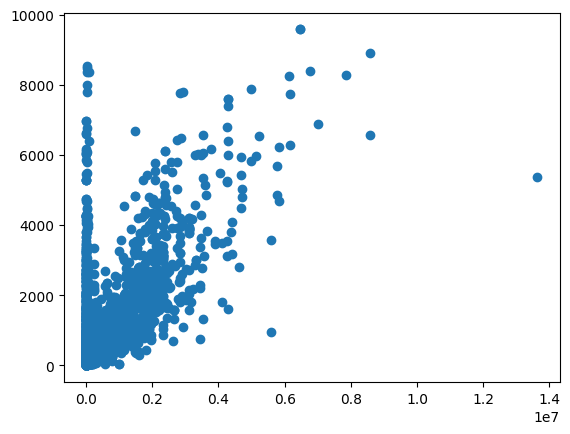

In [31]:
plt.scatter(x=data['volume'], y=data['price'])

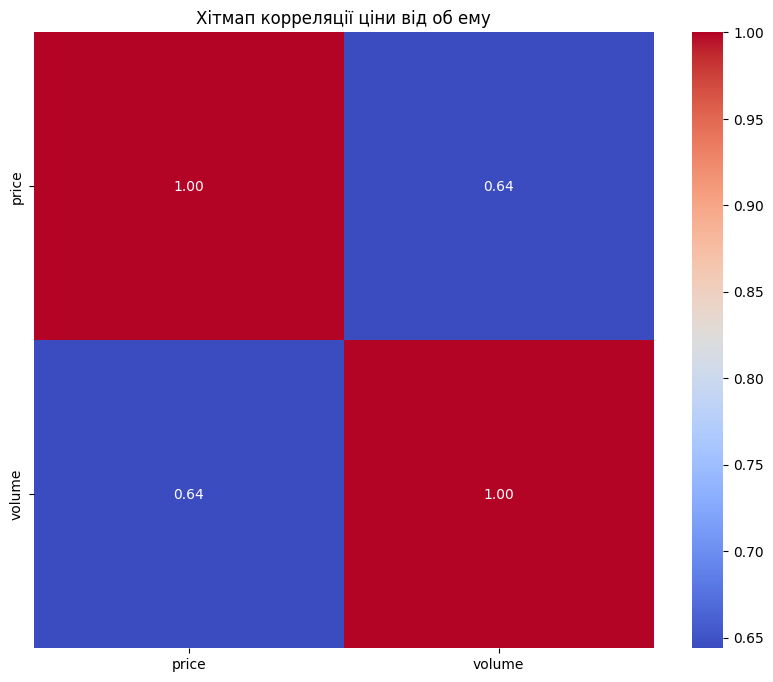

In [32]:
numeric_columns = ['price', 'volume']
numeric_data = data[numeric_columns]

# Створюємо корреляційну матрицю
correlation_matrix = numeric_data.corr()

# Створюємо хітмап
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Хітмап корреляції ціни від об ему')
plt.show()

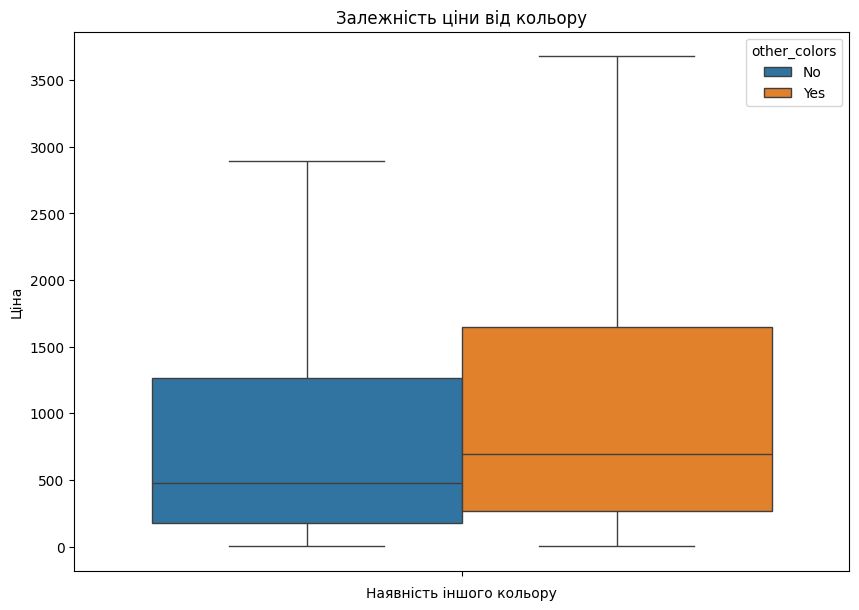

In [33]:
'''
Проаналізуємо залежність ціни від кольору за допомогою ящику з вусами
Можна зробити висновок, що товари, які мають декілька кольорів, коштують дорожче і медіана ціни в них більша
'''

plt.figure(figsize=(10,7))
sns.boxplot(data = data, hue = 'other_colors', y = 'price', showfliers=False)
plt.title('Залежність ціни від кольору')
plt.xlabel('Наявність іншого кольору')
plt.ylabel('Ціна')

plt.show()

In [34]:
'''
Проаналізуємо залежність ціни від виробника
Візьмемо виробників, які мають більше 20 речей
'''
value_by_name=data.groupby("name")['price'].agg(["count", "max", "mean", "median"]).sort_values('count', ascending=False)
print(value_by_name[value_by_name['count'] >= 20])
print(value_by_name[value_by_name['count'] >= 20].sort_values('max', ascending=False))
print(value_by_name[value_by_name['count'] >= 20].sort_values('mean', ascending=False))

                 count     max         mean  median
name                                               
BESTÅ              115  4260.0  1008.400000   920.0
PAX                111  8380.0  2795.342342  2690.0
GRÖNLID             82  8900.0  2529.939024  1605.0
IVAR                66  2275.0   683.954545   590.0
BEKANT              64  6614.0  1934.703125  1274.5
VIMLE               60  8395.0  2257.166667  1657.5
EKET                58  2020.0   456.224138   266.5
PLATSA              57  3493.0  1489.535088  1560.0
LIDHULT             48  9585.0  3583.395833  3124.0
NORDLI              46  2290.0   932.282609   940.0
HAVSTA              40  4770.0  1673.125000  1467.5
TROFAST             40   475.0   194.000000   195.0
JONAXEL             39   990.0   366.538462   195.0
ELVARLI             37  4128.0  1566.783784  1495.0
HEMNES              37  3986.0  1292.283784   995.0
ALGOT               36   594.0   250.233333   239.5
VALLENTUNA          34  7988.0  2574.705882  2124.0
ÄPPLARÖ     

In [35]:
'''
Найбільша кількість меблів у виробника BESTÅ.
Найдорожчі речі у виробника LIDHULT. 
'''

'\nНайбільша кількість меблів у виробника BESTÅ.\nНайдорожчі речі у виробника LIDHULT. \n'

<Axes: xlabel='name'>

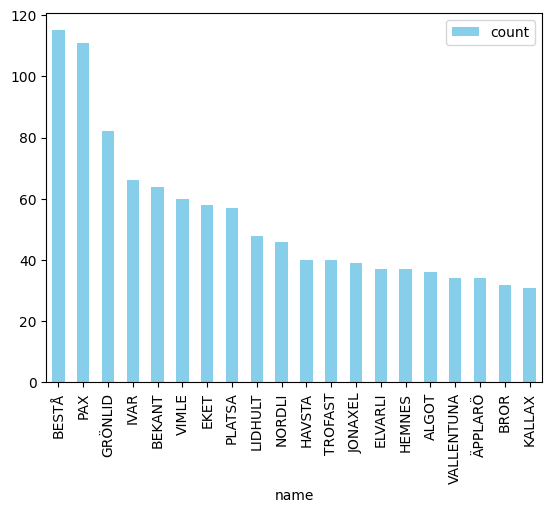

In [36]:
'''
Кількість виробів по виробнику
'''
names = data.groupby('name')['price'].agg(["count"]).sort_values('count', ascending=False)
names=names.iloc[:20]
names.plot(kind='bar', color='skyblue')



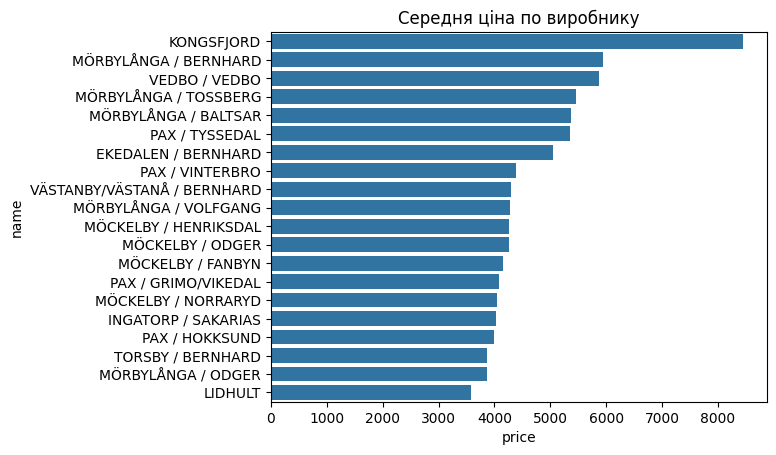

In [37]:
'''
Середня ціна по виробнику
'''
average_prices_by_name = data.groupby('name')['price'].mean().reset_index()
average_prices_by_name = average_prices_by_name.sort_values('price', ascending=False).reset_index(drop=True)
average_prices_by_name = average_prices_by_name.iloc[:20]

sns.barplot(x="price", y="name", data=average_prices_by_name, orient='horizontal')
plt.title('Середня ціна по виробнику')
plt.show()

In [38]:
'''
Проаналізуємо дані по дизайнерам
'''
counts_by_designer = data.groupby("designer")["price"].agg(["count"]).reset_index()
counts_by_designer = counts_by_designer[counts_by_designer['count']>= 20].sort_values('count', ascending=False).reset_index(drop=True)
print(counts_by_designer)

                          designer  count
0                   IKEA of Sweden    683
1                  Ehlén Johansson    136
2                Francis Cayouette    131
3                     Ola Wihlborg    128
4                     Jon Karlsson    106
5              K Hagberg/M Hagberg     98
6   Ehlén Johansson/IKEA of Sweden     70
7   IKEA of Sweden/Ehlén Johansson     68
8                    Henrik Preutz     64
9                     Carina Bengs     60
10   K Malmvall/E Lilja Löwenhielm     55
11                   Nike Karlsson     43
12                 Ebba Strandmark     42
13            Eva Lilja Löwenhielm     41
14               Studio Copenhagen     35
15          H Preutz/A Fredriksson     30
16                     Johan Kroon     27
17                      David Wahl     26
18                  Tord Björklund     26
19                    Mia Lagerman     25
20     IKEA of Sweden/Jon Karlsson     25
21                  Marcus Arvonen     21
22     Jon Karlsson/IKEA of Sweden

<BarContainer object of 24 artists>

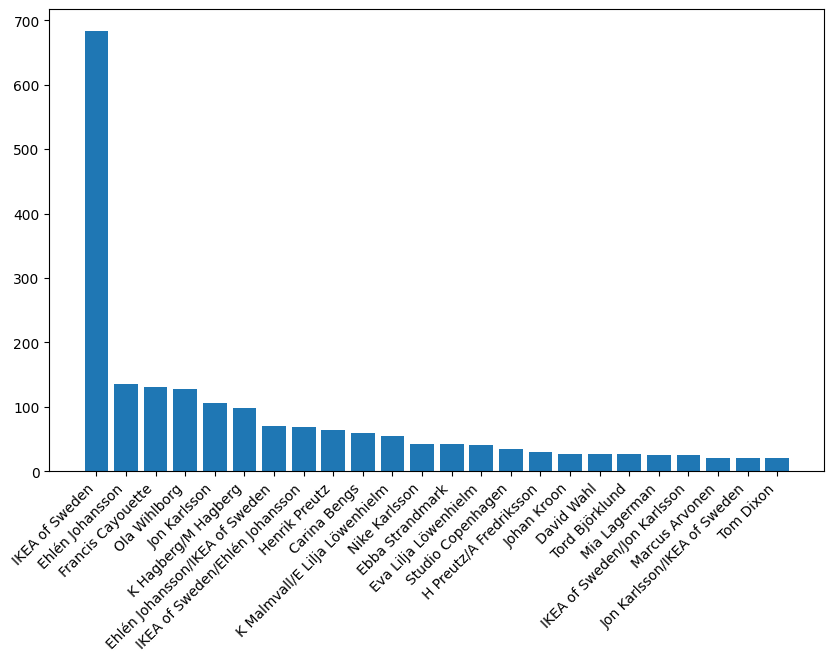

In [39]:
'''
Кількість по дизайнерам
'''
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.bar(counts_by_designer['designer'], counts_by_designer['count'])

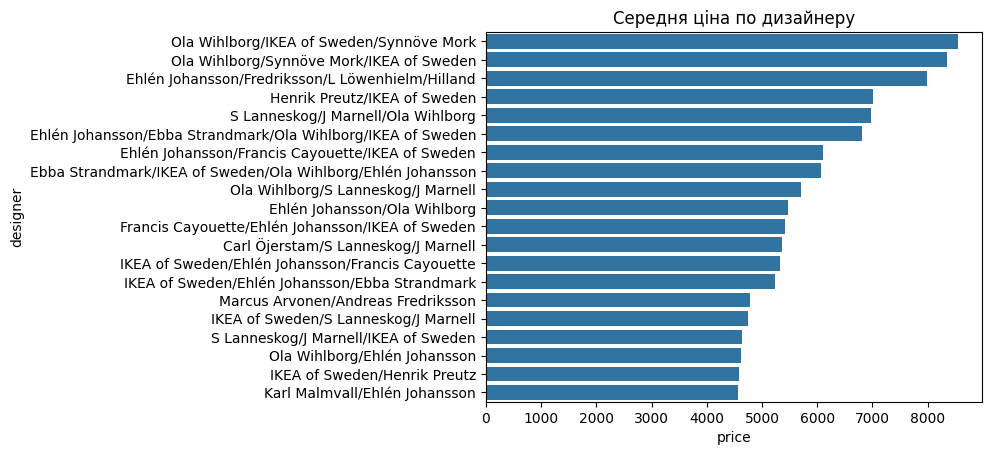

In [40]:
'''
Середня ціна по виробнику
'''
average_prices_by_des = data.groupby('designer')['price'].mean().reset_index()
average_prices_by_des = average_prices_by_des.sort_values('price', ascending=False).reset_index(drop=True)
average_prices_by_des = average_prices_by_des.iloc[:20]

sns.barplot(x="price", y="designer", data=average_prices_by_des, orient='horizontal')
plt.title('Середня ціна по дизайнеру')
plt.show()

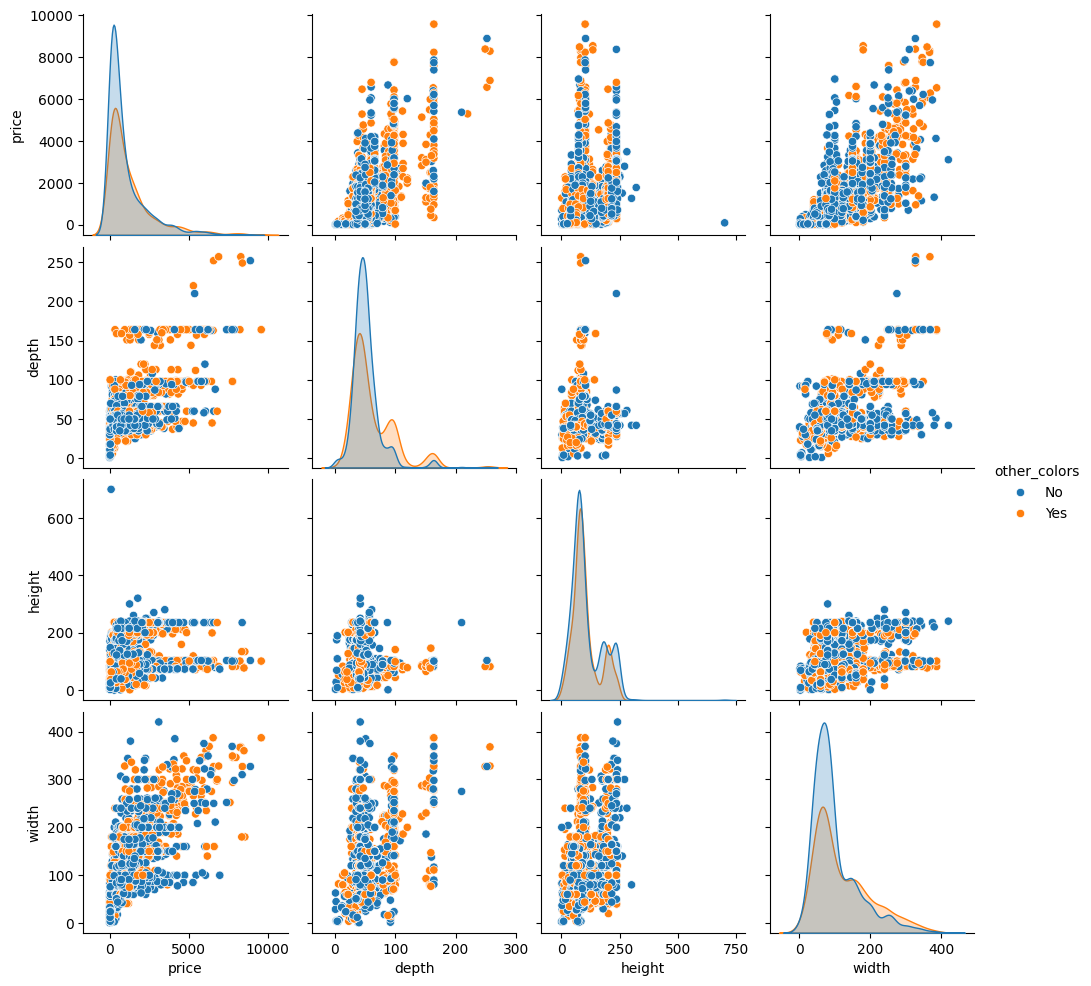

In [41]:
sns.pairplot(data[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors')

<Axes: >

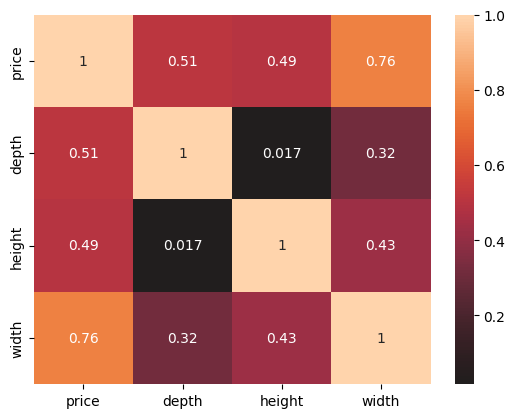

In [42]:
sns.heatmap(data[['price', 'depth', 'height', 'width']].corr(method= 'spearman'), xticklabels= df_ikea[['price', 'depth', 'height', 'width']].corr().columns, yticklabels= df_ikea[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True)

In [43]:
'''
Гіпотеза 1. Більш обємні меблі коштують дорожче, ніж мен обємні
Нульова гіпотеза: великої різниці у ціні в залежності від обєму немає.
Альтернативна гіпотеза 1: менш обємні меблі коштують дорожче обємних
'''

'\nГіпотеза 1. Більш обємні меблі коштують дорожче, ніж мен обємні\nНульова гіпотеза: великої різниці у ціні в залежності від обєму немає.\nАльтернативна гіпотеза 1: менш обємні меблі коштують дорожче обємних\n'

In [44]:
filtered_df = data.dropna(subset=['volume'])

In [45]:
'''
Великими будемо рахувати меблі більше 50*50*50 
'''

'\nВеликими будемо рахувати меблі більше 50*50*50 \n'

In [46]:
big_size=filtered_df[filtered_df['volume'] > 125000]
small_size=filtered_df[filtered_df['volume'] <= 125000]

In [47]:
# 1) t-тест для порівняння середніх цін двух групп
t_statistic, p_value = ttest_ind(big_size['price'], small_size['price'], equal_var=False)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")
famous_designers_mean = np.mean(big_size['price'])
less_known_designers_mean = np.mean(small_size['price'])
difference_means = famous_designers_mean - less_known_designers_mean
if difference_means > 0:
    print(''' Підтверджується гіпотеза 1: Більш обємні меблі коштують дорожче, ніж менш обємні. ''')
else:
    print(''' Підтверджується альтернативна гіпотеза 2: менш обємні меблі коштують дорожче обємних
''')


T-statistic: 12.11
P-value: 0.000
 Підтверджується гіпотеза 1: Більш обємні меблі коштують дорожче, ніж менш обємні. 


In [48]:
''' Альтернативна гіпотеза 2 не вірна для цієї гипотези.
Значення p, рівне 0,000, вказує на те, що ймовірність випадкового спостереження такої 
великої різниці в середніх значеннях між двома групами дуже мала. Іншими словами, 
нульова гіпотеза, яка стверджує, що великої різниці у ціні в залежності від обєму немає, 
може бути відхилена з високим ступенем достовірності. '''

' Альтернативна гіпотеза 2 не вірна для цієї гипотези.\nЗначення p, рівне 0,000, вказує на те, що ймовірність випадкового спостереження такої \nвеликої різниці в середніх значеннях між двома групами дуже мала. Іншими словами, \nнульова гіпотеза, яка стверджує, що великої різниці у ціні в залежності від обєму немає, \nможе бути відхилена з високим ступенем достовірності. '

In [49]:
big_size_prices = big_size['price']
small_size_prices = small_size['price']


In [50]:
# 2) ANOVA test - дисперсионный анализ
''' Це тест, який можна використовувати для порівняння середніх значень більше ніж двох груп. 
У нашому випадку ми можемо використовувати його для порівняння середньої вартості великих та малих меблів. '''
_, p_value = stats.f_oneway(big_size_prices, small_size_prices)
alpha = 0.05
if p_value < alpha:
    print("Відхилити нульову гіпотезу. Існує значуща різниця у середній вартості в залежності від розмірів меблів.")
else:
    print("Не вдалося відхилити нульову гіпотезу. Значущої різниці у середній вартості в залежності від розмірів меблів немає")

Відхилити нульову гіпотезу. Існує значуща різниця у середній вартості в залежності від розмірів меблів.


In [51]:
'''
Гіпотеза 2. Ліжка Sofas & armchairs, Beds , дорожчі за шкафи Bookcases & shelving units, Wardrobes, Cabinets & cupboards
Нульова гіпотеза: великої різниці у ціні ліжок та шкафів немає.
Альтернативна гіпотеза 1: Шкафи коштують дорожче ніж ліжка
'''

'\nГіпотеза 2. Ліжка Sofas & armchairs, Beds , дорожчі за шкафи Bookcases & shelving units, Wardrobes, Cabinets & cupboards\n'

In [67]:
category_groups = {
    'Beds': ['Sofas & armchairs', 'Beds'],
    'Wardrobes': ['Wardrobes', 'Bookcases & shelving units','Cabinets & cupboards']
}
data_group = data.groupby('category')
beds = data_group.get_group('Sofas & armchairs')
for category in category_groups['Beds'][1:]:
    beds = pd.concat([beds, data_group.get_group(category)])
wardrobes = data_group.get_group('Tables & desks')
for category in category_groups['Wardrobes'][1:]:
    wardrobes = pd.concat([wardrobes, data_group.get_group(category)])
print('Beds:')
print(beds)
print('\nWardrobes:')
print(wardrobes)


Beds:
       item_id           name           category   price  sellable_online  \
1474  79151312      SÖDERHAMN  Sofas & armchairs   890.0             True   
1475  79135746      SÖDERHAMN  Sofas & armchairs  1300.0             True   
1476  79315945      STOCKSUND  Sofas & armchairs   995.0             True   
1477  19305567          KIVIK  Sofas & armchairs  2995.0             True   
1478  19305572          KIVIK  Sofas & armchairs  1695.0             True   
...        ...            ...                ...     ...              ...   
151   69292275          VIMLE               Beds  4265.0             True   
152   99275241  STUVA / FÖLJA               Beds  1980.0             True   
153   80332473       SUFFLETT               Beds    85.0             True   
154   69297471       FLOTTEBO               Beds  1996.0             True   
155   39277196        GRÖNLID               Beds  3145.0             True   

                                                   link other_colors 

In [68]:
#1) t-тест для сравнения средних цен двух групп
t_statistic, p_value = ttest_ind(beds['price'], wardrobes['price'], equal_var=False)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")
seating_furniture_mean = np.mean(beds['price'])
storage_furniture_mean = np.mean(wardrobes['price'])
difference_means = seating_furniture_mean - storage_furniture_mean
if difference_means > 0:
    print(''' Підтверджується альтернативна гіпотеза 1: середня ціна на ліжка вища за шкафи. ''')
else:
    print(''' Підтверджується альтернативна гіпотеза 2: середня ціна на шкафи вища за ліжка. ''')
''' Оскільки p-значення дуже мале (p-значення <0,05), можемо відхилити нульову гіпотезу, яка стверджує, 
що середня ціна ліжок та шкафів однакова. Отже, можна зробити висновок, що існує вагома різниця средньої ціни для ліжок та шкафів.
Отже, основна гіпотеза вірна, і ліжка коштують дорожче за шкафи. '''


T-statistic: 11.05
P-value: 0.000
 Підтверджується альтернативна гіпотеза 1: середня ціна на ліжка вища за шкафи. 


' Поскольку p-значение очень мало (p-значение <0,05), мы можем отклонить нулевую гип\nотезу,\nкоторая утверждает, что средняя цена мебели для сидения и хранения одинакова. Следоват\nельно,\nможно сделать вывод о существенной разнице средней цены в зависимости от функции (испо\nльзования) мебели.\nСледовательно, Альтернативная гипотеза 1 верна, и мы можем сказать, что мебель для сид\nения\nв среднем стоит дороже, чем мебель для хранения. '

In [71]:
# 2) ANOVA test - дисперсионный анализ
_, p_value = stats.f_oneway(beds['price'], wardrobes['price'])
alpha = 0.05
if p_value < alpha:
    print("Відхилити нульову гіпотезу. Існує значуща різниця у середній вартості ліжок та шкафів.")
else:
    print("Не вдалося відхилити нульову гіпотезу. Значущої різниці у середній вартості ліжок та шкафів немає")
''' Отже, ANOVA test підтверджують основну гіпотезу. '''


Відхилити нульову гіпотезу. Існує значуща різниця у середній вартості ліжок та шкафів.


' Отже, ANOVA test підтверджують основну гіпотезу. '

In [52]:
'''
Замінемо нерелевантні значення дизайнерів на None
'''
digit_mask = data['designer'].str.contains('\d')
analysis_data = data[~digit_mask].reset_index(drop=True)


analysis_data['designer'].count()


2860

In [53]:
'''
Підготуємо дані до машинного навчання
'''
exclude_cols = ['item_id', 'price']
num_cols = ['depth', 'height', 'width']
cat_cols = ['name', 'category', 'designer', 'sellable_online', 'other_colors', 'link', 'short_description']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])
analysis_data1=analysis_data.drop(exclude_cols, axis=1)



In [54]:
X_train, X_test, y_train, y_test = train_test_split(analysis_data1, analysis_data['price'], test_size=0.2, random_state=42)
# 1) KNeighborsRegressor
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn_regressor', KNeighborsRegressor())
])

model_knn.fit(X_train, y_train)
y_knn_pred = model_knn.predict(X_test)
''' Оценим производительность модели:
'''
print('R^2 : {:.5f}'.format(model_knn.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(y_knn_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(y_knn_pred, y_test))))

R^2 : 0.79582
MAE : 355.35692
MSE : 581.09054


In [55]:
# 2) LinearRegression
LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LR_regressor', LinearRegression())
])
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
print('R^2 : {:.5f}'.format(LR.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(LR_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(LR_pred, y_test))))

R^2 : 0.78994
MAE : 387.95979
MSE : 589.39360


In [56]:
# 3) DecisionTreeRegressor
dtr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('DTR_regressor', DecisionTreeRegressor(random_state=42))
])
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_pred, y_test))))

R^2 : 0.73659
MAE : 340.67640
MSE : 660.00455


In [57]:
# 4) RandomForestClassifier
rfr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfс_regressor', RandomForestRegressor(random_state=42))
])
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

print('R^2 : {:.5f}'.format(rfr.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(rfr_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(rfr_pred, y_test))))


R^2 : 0.81085
MAE : 310.52838
MSE : 559.29212


In [58]:
dtr_param_grid = {
    'DTR_regressor__max_depth': [5, 10, 15, 20, None],
    'DTR_regressor__min_samples_split': [3, 6, 8, 12],
    'DTR_regressor__min_samples_leaf': [6, 8, 11, 15]
}
dtr_gs = GridSearchCV(dtr, dtr_param_grid, cv=5)
dtr_gs.fit(X_train, y_train)
print(f"Decision Tree: best parameters {dtr_gs.best_params_}, best score {dtr_gs.best_score_}")


Decision Tree: best parameters {'DTR_regressor__max_depth': None, 'DTR_regressor__min_samples_leaf': 6, 'DTR_regressor__min_samples_split': 3}, best score 0.7099335909242058


In [59]:
# DecisionTreeRegressor с настроенными гиперпараметрами
best_params = {
'max_depth': None,
'min_samples_leaf': 6,
'min_samples_split': 3,
'splitter': 'best'
}
dtr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('DTR_regressor', DecisionTreeRegressor(random_state=42, **best_params))
])
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_pred, y_test))))


R^2 : 0.71032
MAE : 405.73508
MSE : 692.14190


In [60]:
knn_param_grid = {'knn_regressor__n_neighbors': [i for i in range(1, 16)], 'knn_regressor__weights': ['uniform', 'distance']}
knn_gs = GridSearchCV(model_knn, knn_param_grid, cv=5)
knn_gs.fit(X_train, y_train)
print(f"KNN: best parameters {knn_gs.best_params_}, best score {knn_gs.best_score_}")

KNN: best parameters {'knn_regressor__n_neighbors': 4, 'knn_regressor__weights': 'distance'}, best score 0.7804350213607363


In [61]:
# KNeighborsRegressor с настроенными гиперпараметрами
best_params = {
'n_neighbors': 4,
'weights': 'distance'
}
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn_regressor', KNeighborsRegressor(**best_params))
])

model_knn.fit(X_train, y_train)
y_knn_pred = model_knn.predict(X_test)
''' Оценим производительность модели:
'''
print('R^2 : {:.5f}'.format(model_knn.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(y_knn_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(y_knn_pred, y_test))))

R^2 : 0.80828
MAE : 333.95522
MSE : 563.07820


In [62]:
rfc_param_grid = {
    'rfс_regressor__n_estimators': [3, 7, 10],
    'rfс_regressor__max_depth': [None, 4, 8],
    'rfс_regressor__min_samples_split': [2, 5, 10],
    'rfс_regressor__min_samples_leaf': [1, 2, 4]
}

rfc_gs = GridSearchCV(rfr, rfc_param_grid, cv=5)

rfc_gs.fit(X_train, y_train)

print(f"Random Forest: best parameters {rfc_gs.best_params_}, best score {rfc_gs.best_score_}")


Random Forest: best parameters {'rfс_regressor__max_depth': None, 'rfс_regressor__min_samples_leaf': 2, 'rfс_regressor__min_samples_split': 2, 'rfс_regressor__n_estimators': 7}, best score 0.798260072457742


In [63]:
# RandomForestClassifier с настроенными гиперпараметрами
best_params = {
'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 7
}
rfr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfс_regressor', RandomForestRegressor(random_state=42, **best_params))
])
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

print('R^2 : {:.5f}'.format(rfr.score(X_test, y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(rfr_pred, y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(rfr_pred, y_test))))

R^2 : 0.77940
MAE : 341.79840
MSE : 604.00542


In [64]:
'''
Проаналізувавши 4 моделі, та налаштувавши їх за допомогою гіперпараметрів, можна зробити висновок, що найкраще себе показала модель KNeighborsRegressor
з оцінкою 0,808 та середньою помилкою 334. Найгірше себе показала модель DecisionTreeRegressor з оцінкою 0,71 та середньою помилкою 406.
Але все одно це досить велика помилка. Для підвищення точності оцінки, до моделі можна додати стовпці

1) розмір пакування
2) кількість кольорів
3) рік випуску
4) матеріал, з якого виготовлено меблі
5) гарантійний строк мебелів
'''

'\nПроаналізувавши 4 моделі, та налаштувавши їх за допомогою гіперпараметрів, можна зробити висновок, що найкраще себе показала модель KNeighborsRegressor\nз оцінкою 0,808 та середньою помилкою 334. Найгірше себе показала модель DecisionTreeRegressor з оцінкою 0,71 та середньою помилкою 406.\nАле все одно це досить велика помилка. Для підвищення точності оцінки, до моделі можна додати стовпці\n\n1) розмір пакування\n2) кількість кольорів\n3) рік випуску\n4) матеріал, з якого виготовлено меблі\n5) гарантійний строк мебелів\n'